In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('artifacts/adult_cleaned.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,44,Private,162028,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,0,0,2415,6,United-States,1
1,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,1,0,2415,40,Non-US,1
2,41,Private,132222,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,1,0,2415,40,United-States,1
3,37,Private,329980,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,1,0,2415,60,United-States,1
4,55,Self-emp-inc,124137,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,1,0,2415,35,Non-US,1


# Feature Engineering

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [5]:
df["net.capital"] = df["capital.gain"] - df["capital.loss"]

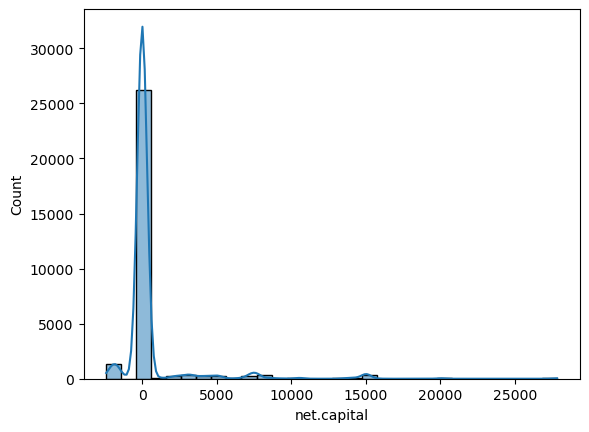

In [6]:
sns.histplot(df["net.capital"], kde=True, bins=30)
plt.show()

In [7]:
df["capital.gain.log"] = np.log1p(df["capital.gain"])
df["capital.loss.log"] = np.log1p(df["capital.loss"])

In [8]:
# Create age_group feature
df['age_group'] = pd.cut(
    df['age'], 
    bins=[0, 25, 50, 75, 100], 
    labels=['Young', 'Adult', 'Senior', 'Very Senior'], 
    right=False
)

# Create hours_per_week_group feature
df['hours_per_week_group'] = pd.cut(
    df['hours.per.week'], 
    bins=[0, 30, 45, 60, 1000], 
    labels=['Part-time', 'Full-time', 'Overtime', 'Very Overtime'], 
    right=False
)

In [9]:
df[['age', 'age_group', 'hours.per.week', 'hours_per_week_group']].head()

,age,age_group,hours.per.week,hours_per_week_group
0,44,Adult,6,Part-time
1,51,Senior,40,Full-time
2,41,Adult,40,Full-time
3,37,Adult,60,Very Overtime
4,55,Senior,35,Full-time


In [10]:
education_map = {
    'Preschool': 'EarlySchool',
    '1st-4th': 'EarlySchool',
    '5th-6th': 'EarlySchool',
    '7th-8th': 'MiddleSchool',
    '9th': 'MiddleSchool',
    '10th': 'HighSchool-NoDiploma',
    '11th': 'HighSchool-NoDiploma',
    '12th': 'HighSchool-NoDiploma',
    'HS-grad': 'HighSchool-Grad',
    'Some-college': 'SomeCollege',
    'Assoc-acdm': 'Associates',
    'Assoc-voc': 'Associates',
    'Bachelors': 'Bachelors',
    'Masters': 'Graduate',
    'Doctorate': 'Graduate',
    'Prof-school': 'Graduate'
}

df['education'] = df['education'].map(education_map)
df['education'].value_counts()

education
HighSchool-Grad         9790
SomeCollege             6655
Bachelors               4989
Graduate                2451
Associates              2305
HighSchool-NoDiploma    2234
MiddleSchool            1008
EarlySchool              481
Name: count, dtype: int64

In [11]:
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Entrepreneur')
df['workclass'] = df['workclass'].replace(['No_workclass'], 'Without-pay')

df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Married')

In [12]:
df['relationship'].value_counts()

relationship
Married           13740
Not-in-family      7662
Own-child          4459
Unmarried          3167
Other-relative      885
Name: count, dtype: int64

In [13]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       13934
Never-married             9688
Divorced                  4160
Separated                  925
Widowed                    818
Married-spouse-absent      367
Married-AF-spouse           21
Name: count, dtype: int64

In [14]:
df["is_single_parent"] = (
    (df["relationship"].isin(["Own-child", "Other-relative"])) &
    (~df["marital.status"].str.contains("Married"))
).astype(int)

In [15]:
df["is_single_parent"].value_counts()

is_single_parent
0    24840
1     5073
Name: count, dtype: int64

In [16]:
df['native.country'].value_counts()

native.country
United-States    27272
Non-US            2641
Name: count, dtype: int64

In [17]:
df['is_US'] = (df['native.country'] == 'United-States').astype(int)
df['is_US'].value_counts()

is_US
1    27272
0     2641
Name: count, dtype: int64

In [18]:
X = df.drop(columns="income")
y = df["income"]

In [19]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'net.capital', 'capital.gain.log', 'capital.loss.log', 'age_group',
       'hours_per_week_group', 'is_single_parent', 'is_US'],
      dtype='object')

Remove fnlwgt as it doesn't really affect the outcome.

Remove maritial status because it depends on relationship.

In [20]:
df.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education                 object
education.num              int64
marital.status            object
occupation                object
relationship              object
race                      object
sex                        int64
capital.gain               int64
capital.loss               int64
hours.per.week             int64
native.country            object
income                     int64
net.capital                int64
capital.gain.log         float64
capital.loss.log         float64
age_group               category
hours_per_week_group    category
is_single_parent           int32
is_US                      int32
dtype: object

In [21]:
# Use Ordinal Encoding for education
education_order = [
    'EarlySchool', 
    'MiddleSchool',
    'HighSchool-NoDiploma',
    'HighSchool-Grad',
    'SomeCollege',
    'Associates',
    'Bachelors',
    'Graduate'
]

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

standard_features = ['age', 'capital.gain.log', 'capital.loss.log', 'net.capital']
minmax_features = ['hours.per.week']
binary_features = ["sex", "is_single_parent", "is_US"]
categorical_features = [
    "workclass", "occupation", "relationship",
    "race", "age_group", "hours_per_week_group"
]
ordinal_features = ['education']

preprocessor = ColumnTransformer(
    transformers=[
        ("std", StandardScaler(), standard_features),
        ("minmax", MinMaxScaler(), minmax_features),
        ("bin", "passthrough", binary_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("ord", OrdinalEncoder(categories=[education_order], dtype=int), ordinal_features)
    ],
    remainder="drop"
)

# Splitting Dataset

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

In [24]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [25]:
X_transformed_columns = preprocessor.get_feature_names_out()
X_transformed_columns

array(['std__age', 'std__capital.gain.log', 'std__capital.loss.log',
       'std__net.capital', 'minmax__hours.per.week', 'bin__sex',
       'bin__is_single_parent', 'bin__is_US',
       'cat__workclass_Entrepreneur', 'cat__workclass_Federal-gov',
       'cat__workclass_Local-gov', 'cat__workclass_Private',
       'cat__workclass_State-gov', 'cat__workclass_Without-pay',
       'cat__occupation_Adm-clerical', 'cat__occupation_Armed-Forces',
       'cat__occupation_Craft-repair', 'cat__occupation_Exec-managerial',
       'cat__occupation_Farming-fishing',
       'cat__occupation_Handlers-cleaners',
       'cat__occupation_Machine-op-inspct',
       'cat__occupation_Other-service', 'cat__occupation_Priv-house-serv',
       'cat__occupation_Prof-specialty',
       'cat__occupation_Protective-serv', 'cat__occupation_Sales',
       'cat__occupation_Tech-support', 'cat__occupation_Transport-moving',
       'cat__relationship_Married', 'cat__relationship_Not-in-family',
       'cat__relations

In [27]:
print(X_train_transformed.shape, X_test_transformed.shape)

(23930, 47) (5983, 47)


In [29]:
X_train = pd.DataFrame(
    X_train_transformed, 
    columns=X_transformed_columns
)

X_test = pd.DataFrame(
    X_test_transformed, 
    columns=X_transformed_columns
)

In [32]:
X_train.head()

,std__age,std__capital.gain.log,std__capital.loss.log,std__net.capital,minmax__hours.per.week,bin__sex,bin__is_single_parent,bin__is_US,cat__workclass_Entrepreneur,cat__workclass_Federal-gov,...,cat__race_White,cat__age_group_Adult,cat__age_group_Senior,cat__age_group_Very Senior,cat__age_group_Young,cat__hours_per_week_group_Full-time,cat__hours_per_week_group_Overtime,cat__hours_per_week_group_Part-time,cat__hours_per_week_group_Very Overtime,ord__education
0,1.034782,-0.292981,-0.214619,-0.199739,0.602041,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,1.794393,-0.292981,-0.214619,-0.199739,0.316327,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
2,1.262666,-0.292981,-0.214619,-0.199739,0.112245,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
3,1.338627,-0.292981,-0.214619,-0.199739,0.295918,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.730938,-0.292981,-0.214619,-0.199739,0.397959,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


In [33]:
X_test.head()

,std__age,std__capital.gain.log,std__capital.loss.log,std__net.capital,minmax__hours.per.week,bin__sex,bin__is_single_parent,bin__is_US,cat__workclass_Entrepreneur,cat__workclass_Federal-gov,...,cat__race_White,cat__age_group_Adult,cat__age_group_Senior,cat__age_group_Very Senior,cat__age_group_Young,cat__hours_per_week_group_Full-time,cat__hours_per_week_group_Overtime,cat__hours_per_week_group_Part-time,cat__hours_per_week_group_Very Overtime,ord__education
0,-0.560401,-0.292981,4.617527,-0.868334,0.397959,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
1,-1.168090,-0.292981,-0.214619,-0.199739,0.295918,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0
2,-0.180596,-0.292981,-0.214619,-0.199739,0.500000,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,-0.712324,-0.292981,-0.214619,-0.199739,0.397959,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
4,0.654977,-0.292981,4.514974,-0.770350,0.469388,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


# Feature Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {} # To store the average CV ROC-AUC for each N

for N in range(2, 11):
    print(f"Evaluating N={N} using 5-Fold Cross-Validation on training data...")
    fold_scores = []
    
    # Perform CV on the training data
    for train_idx, val_idx in cv.split(X_train, y_train):
        
        # Split the training data into temporary CV-Train and CV-Validation sets
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Feature Selection: Fit and Transform ONLY on CV-TRAIN
        k_best = SelectKBest(score_func=f_classif, k=N)
        X_cv_train_sel = k_best.fit_transform(X_cv_train, y_cv_train)
        
        # Transform CV-VALIDATION set
        X_cv_val_sel = k_best.transform(X_cv_val)
        
        # Model Training: Train model on CV-Train selected features
        rfc = RandomForestClassifier(n_estimators=100, random_state=42)
        rfc.fit(X_cv_train_sel, y_cv_train)
        
        # Evaluation: Evaluate on CV-Validation selected features
        # 1. Get hard class predictions (0 or 1)
        y_cv_val_pred = rfc.predict(X_cv_val_sel)

        # 2. Calculate F1-score
        val_f1 = f1_score(y_cv_val, y_cv_val_pred)

        fold_scores.append(val_f1)
        
    # Store the average F1 for this N
    avg_cv_f1 = np.mean(fold_scores)
    cv_results[N] = avg_cv_f1
    print(f"  Average CV F1 for N={N}: {avg_cv_f1:.4f}")

# Get best N based on CV performance
best_N = max(cv_results, key=cv_results.get)
best_cv_f1 = cv_results[best_N]
print("-" * 50)
print(f"Best N (based on TRAINING CV): {best_N} with Average CV F1: {best_cv_f1:.4f}")

Evaluating N=2 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=2: 0.5215
Evaluating N=3 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=3: 0.6543
Evaluating N=4 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=4: 0.6554
Evaluating N=5 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=5: 0.6544
Evaluating N=6 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=6: 0.6632
Evaluating N=7 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=7: 0.6673
Evaluating N=8 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=8: 0.6585
Evaluating N=9 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=9: 0.6474
Evaluating N=10 using 5-Fold Cross-Validation on training data...
  Average CV F1 for N=10: 0.6478
--------------------------------------------------
Best N (based on TRAINING CV): 7 with Average CV F1: 0.6673


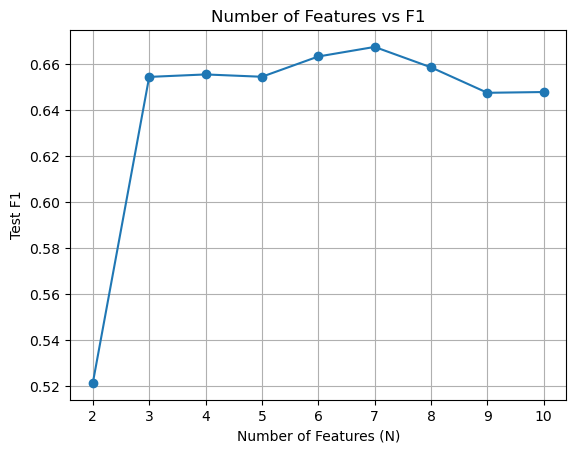

In [35]:
# Plot N vs F1
Ns, roc_aucs = cv_results.keys(), cv_results.values()
plt.plot(Ns, roc_aucs, marker='o')
plt.title('Number of Features vs F1')
plt.xlabel('Number of Features (N)')
plt.ylabel('Test F1')
plt.grid()
plt.show()

In [36]:
k_best = SelectKBest(score_func=f_classif, k=best_N)
X_train_sel = k_best.fit_transform(X_train_transformed, y_train)
X_test_sel = k_best.transform(X_test_transformed)

In [37]:
# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of all processed features
all_feature_names = preprocessor.get_feature_names_out()

# Get the names of the selected features
selected_feature_names = all_feature_names[selected_feature_indices]

# Get the scores of the selected features
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Create a pandas Series to display feature importance
sorted_feature_importance = (
    pd.Series(selected_feature_scores, index=selected_feature_names)
    .sort_values(ascending=False)
)

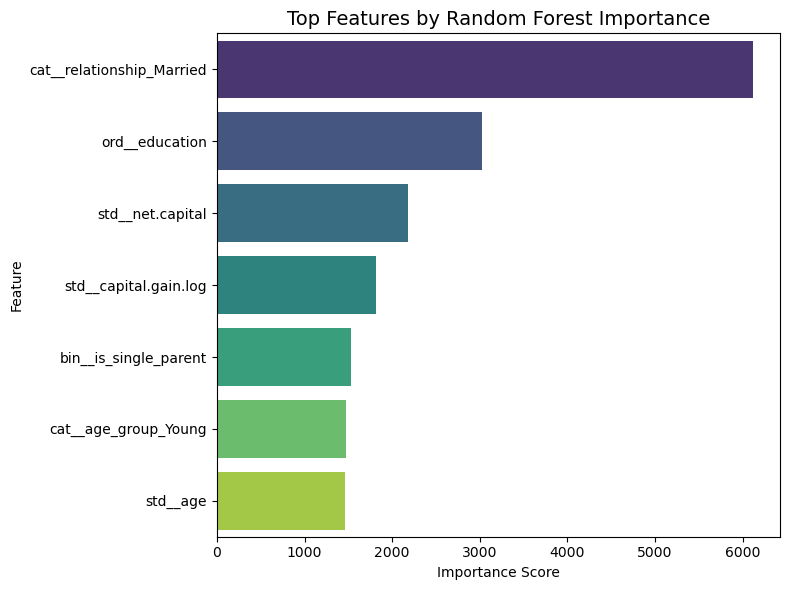

In [38]:
# Convert the Series to a DataFrame
df_importance = sorted_feature_importance.reset_index()
df_importance.columns = ['feature', 'importance_score']

# Create the plot
plt.figure(figsize=(8, 6))

# Use x and y to specify horizontal bars, and palette to set the color
sns.barplot(
    data=df_importance,
    x='importance_score',
    y='feature',
    hue='feature',
    palette='viridis',
    legend=False
)

plt.title("Top Features by Random Forest Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [39]:
y_train.value_counts()

income
0    18075
1     5855
Name: count, dtype: int64

In [40]:
# Get X_train and X_test with selected features
X_train_sel = k_best.transform(X_train_transformed)
X_test_sel = k_best.transform(X_test_transformed)

In [41]:
import joblib

# Save final datasets
joblib.dump((X_train_sel, X_test_sel, y_train, y_test), 'artifacts/final_census_data.pkl')

['artifacts/final_census_data.pkl']